In [28]:
! pip install --upgrade keras-cv tensorflow

In [29]:
import json
import keras_cv

import keras_core as keras
import numpy as np

In [30]:
model = keras_cv.models.ImageClassifier.from_preset(
    "efficientnetv1_b7",num_classes=1000
)

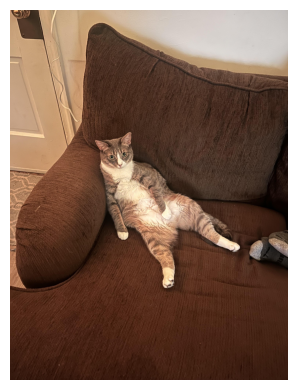

In [31]:
url = 'https://i.redd.it/twpfhcw58xgb1.jpg'
# url = 'https://i.redd.it/aq53vqeaz5nb1.jpg'
# url = 'https://wallup.net/wp-content/uploads/2014/10/cars/Ferrari_Enzo_Sport_Car_HD.jpg'
filepath = keras.utils.get_file(origin=url)
image = keras.utils.load_img(filepath)
image = np.array(image)
h, w, c = image.shape
image_batch = image.reshape((1, h, w, c))
keras_cv.visualization.plot_image_gallery(
  image_batch, rows=1, cols=1, value_range=(0, 255), show=True, scale=4
)

In [32]:
probs = model.predict(image_batch)
probs.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 96s 96s/step


(1, 1000)

In [33]:
top_classes = (-probs[0]).argsort()
top_classes[: 5]

array([409, 753, 292, 324, 153])

In [34]:
url = 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/kerascv/imagenet_label_names.json'
label_names_filepath = keras.utils.get_file(origin=url)

with open(label_names_filepath) as f:
  label_names = json.load(f)

In [35]:
print(f"Labels Name : {label_names}")

Labels Name : ['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead shark', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'American robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'American dipper', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'fire salamander', 'smooth newt', 'newt', 'spotted salamander', 'axolotl', 'American bullfrog', 'tree frog', 'tailed frog', 'loggerhead sea turtle', 'leatherback sea turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'green iguana', 'Carolina anole', 'desert grassland whiptail lizard', 'agama', 'frilled-necked lizard', 'alligator lizard', 'Gila monster', 'European green lizard', 'chameleon', 'Komodo dragon', 'Nile crocodile', 'American alligator', 'triceratops', 'worm snake', 'ring-necked snake', 'eastern hog-nosed snake', 'smooth green snake', 'kingsnake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', '

In [36]:
len(label_names)

1000

In [37]:
for c in top_classes[:5]:
  print(label_names[c])

analog clock
radiator
tiger
small white
Maltese
